In [333]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from scipy.fft import fft, ifft, fftfreq
from scipy.interpolate import interp1d
from scipy.optimize import minimize
import scipy.signal as signal

In [334]:
data_dn = pd.read_excel("2024_10_29_Divyansh_IE3 data.xlsx", sheet_name="raw DN")
data_rad = pd.read_excel("2024_10_29_Divyansh_IE3 data.xlsx", sheet_name="radiance with correction")
data_rad_not = pd.read_excel("2024_10_29_Divyansh_IE3 data.xlsx", sheet_name="radiance without correction")

In [352]:
df_white_ref = pd.DataFrame(columns=['Wavelength', 'Radiance', 'Radiance without correction', 'DN'])
df_white_ref['Wavelength'] = data_rad['rad_white_reference00000.asd.pco'][1:].astype(float)
df_white_ref['DN'] = data_dn['Unnamed: 10'][1:].astype(float)
df_white_ref['Radiance'] = data_rad['Unnamed: 12'][1:].astype(float)
df_white_ref['Radiance without correction'] = data_rad_not['Unnamed: 12'][1:].astype(float)

df_epidote = pd.DataFrame(columns=['Wavelength', 'Radiance', 'Radiance without correction', 'DN'])
df_epidote['Wavelength'] = data_rad['rad_epidote00000.asd.pco'][1:].astype(float)
concat_epidote = pd.concat([data_dn['Unnamed: 2'][1:], data_dn['Unnamed: 4'][1:]])
df_epidote['DN'] = concat_epidote.groupby(concat_epidote.index).mean().astype(float)
concat_epidote = pd.concat([data_rad['Unnamed: 2'][1:], data_rad['Unnamed: 4'][1:]])
df_epidote['Radiance'] = concat_epidote.groupby(concat_epidote.index).mean().astype(float)
concat_epidote = pd.concat([data_rad_not['Unnamed: 2'][1:], data_rad_not['Unnamed: 4'][1:]])
df_epidote['Radiance without correction'] = concat_epidote.groupby(concat_epidote.index).mean().astype(float)

df_gypsum = pd.DataFrame(columns=['Wavelength', 'Radiance', 'Radiance without correction', 'DN'])
df_gypsum['Wavelength'] = data_rad['rad_gypsum00000.asd.pco'][1:].astype(float)
concat_gypsum = pd.concat([data_dn['Unnamed: 6'][1:], data_dn['Unnamed: 8'][1:]])
df_gypsum['DN'] = concat_gypsum.groupby(concat_gypsum.index).mean().astype(float)
concat_gypsum = pd.concat([data_rad['Unnamed: 8'][1:], data_rad['Unnamed: 10'][1:]])
df_gypsum['Radiance'] = concat_gypsum.groupby(concat_gypsum.index).mean().astype(float)
concat_gypsum = pd.concat([data_rad_not['Unnamed: 8'][1:], data_rad_not['Unnamed: 10'][1:]])
df_gypsum['Radiance without correction'] = concat_gypsum.groupby(concat_gypsum.index).mean().astype(float)

In [353]:
# Normalization using MinMaxScaler
scaler = MinMaxScaler()
df_white_ref['DN'] = scaler.fit_transform(df_white_ref['DN'].values.reshape(-1, 1))
df_white_ref['Radiance'] = scaler.fit_transform(df_white_ref['Radiance'].values.reshape(-1, 1))
df_white_ref['Radiance without correction'] = scaler.fit_transform(df_white_ref['Radiance without correction'].values.reshape(-1, 1))

df_epidote['DN'] = scaler.fit_transform(df_epidote['DN'].values.reshape(-1, 1))
df_epidote['Radiance'] = scaler.fit_transform(df_epidote['Radiance'].values.reshape(-1, 1))
df_epidote['Radiance without correction'] = scaler.fit_transform(df_epidote['Radiance without correction'].values.reshape(-1, 1))

df_gypsum['DN'] = scaler.fit_transform(df_gypsum['DN'].values.reshape(-1, 1))
df_gypsum['Radiance'] = scaler.fit_transform(df_gypsum['Radiance'].values.reshape(-1, 1))
df_gypsum['Radiance without correction'] = scaler.fit_transform(df_gypsum['Radiance without correction'].values.reshape(-1, 1))

Breaks at 1000 (650) and 1800 (1450)


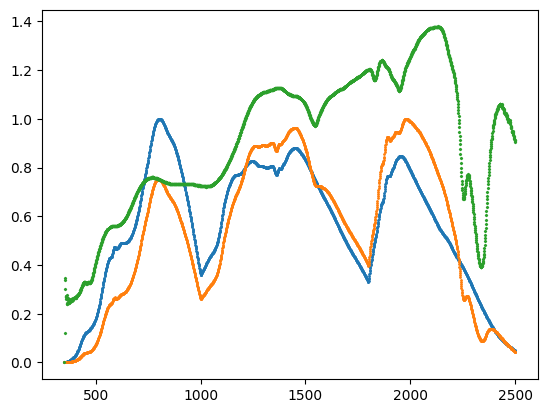

In [354]:
plt.scatter(df_white_ref['Wavelength'], df_white_ref['Radiance'], s = 1)
plt.scatter(df_epidote['Wavelength'], df_epidote['Radiance'], s = 1)
plt.scatter(df_epidote['Wavelength'], df_epidote['Radiance']/(df_white_ref['Radiance']), s = 2, marker='x')
print("Breaks at 1000 (650) and 1800 (1450)")
plt.show()

In [355]:
fft_ = np.fft.fft(df_epidote['Radiance'][:650])
N = len(df_epidote['Radiance'][:650])
freq = np.fft.fftfreq(N, 1)

c:\Users\divyansh asthana\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\divyansh asthana\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


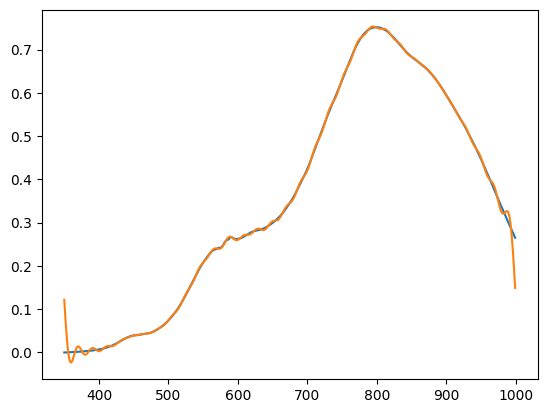

In [356]:
threshold = 0.9
fft_filtered = np.where(np.abs(fft_) < threshold, 0, fft_)
filtered = ifft(fft_filtered)
plt.plot(df_epidote['Wavelength'][:650], df_epidote['Radiance'][:650])
plt.plot(df_epidote['Wavelength'][:650], filtered)
plt.show()

In [357]:
fft_filtered[fft_filtered != 0]

array([ 2.28491891e+02  +0.j        , -3.61568880e+01+103.24006632j,
       -2.62369604e+01 +13.21038838j,  6.49408451e+00  +8.04634132j,
       -8.10971462e+00  +7.37862791j, -3.06259480e+00  +5.49201846j,
        5.53026544e-01  +4.77530469j, -4.00077344e-01  +3.98384456j,
       -1.63912758e+00  +2.96662509j, -4.97969087e-01  +2.6765037j ,
       -4.36914035e-01  +2.62275567j, -5.30454008e-01  +2.37937172j,
       -3.31074663e-01  +2.52288604j, -4.69571323e-01  +2.18061518j,
       -1.28588905e-01  +1.70866575j, -3.95700632e-01  +1.84808527j,
       -2.45240482e-01  +1.72680893j, -2.19740268e-01  +1.46052533j,
       -3.81401615e-01  +1.58938139j, -7.69783349e-02  +1.45234307j,
       -3.23041337e-01  +1.25190379j, -2.36579108e-01  +1.4329878j ,
       -9.45542401e-02  +1.13878983j, -3.11858459e-01  +1.13538581j,
       -1.61562353e-01  +1.21169114j, -1.59501671e-01  +0.98905316j,
       -2.78925179e-01  +1.07211498j, -1.21694103e-01  +1.04176467j,
       -1.73056324e-01  +0.9046811

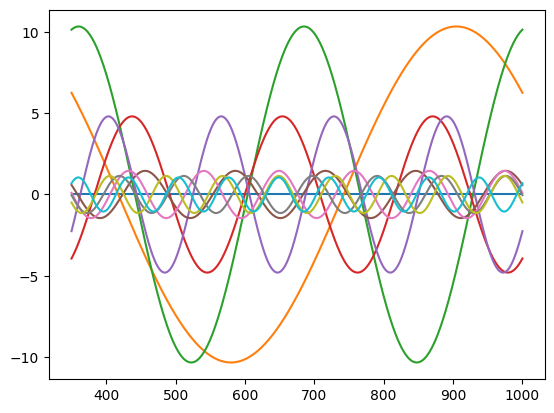

In [358]:
x = np.linspace(350, 1000, 650)
fft_sort = sorted(fft_filtered, reverse=True)
fft_sort = np.where(fft_sort != 0, fft_sort, 0)
useful_fft = fft_sort[fft_sort != 0]

for i in range(len(useful_fft[:10])):
    sum = np.abs(useful_fft[i])*np.sin(2*np.pi*freq[i]*x + np.angle(useful_fft[i]))
    plt.plot(x, sum)
plt.show()

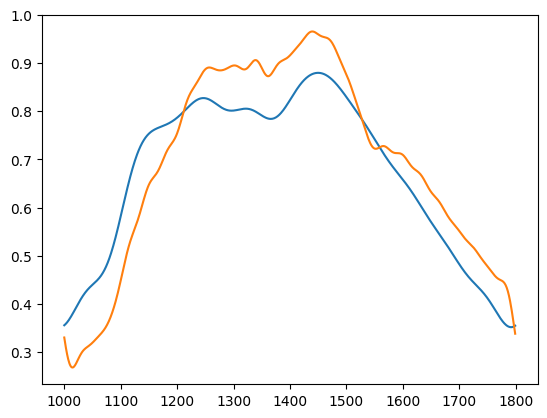

In [359]:
# Getting the fourier transform for white reference
fft_white_ref = np.fft.fft(df_white_ref['Radiance'][650:1450])
fft_epidote = np.fft.fft(df_epidote['Radiance'][650:1450])

# Removing the noise
threshold = 0.9
fft_filtered_white = np.where(np.abs(fft_white_ref) < threshold, 0, fft_white_ref)
fft_filtered_epidote = np.where(np.abs(fft_epidote) < threshold, 0, fft_epidote)

plt.plot(df_white_ref['Wavelength'][650:1450], ifft(fft_filtered_white))
plt.plot(df_epidote['Wavelength'][650:1450], ifft(fft_filtered_epidote))

In [360]:
fft_matched = fft_filtered_white[np.abs(fft_filtered_white) == np.abs(fft_filtered_epidote)]
fft_matched[fft_matched != 0]

array([], dtype=complex128)

In [361]:
# This analysis failed terribly...

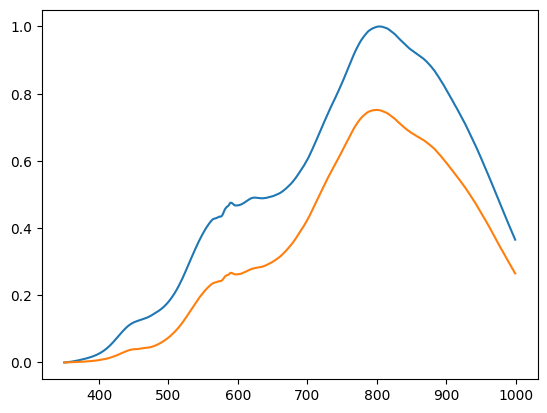

In [362]:
# Inverse function analysis.

plt.plot(df_white_ref['Wavelength'][:650], df_white_ref['Radiance'][:650])
plt.plot(df_epidote['Wavelength'][:650], df_epidote['Radiance'][:650])

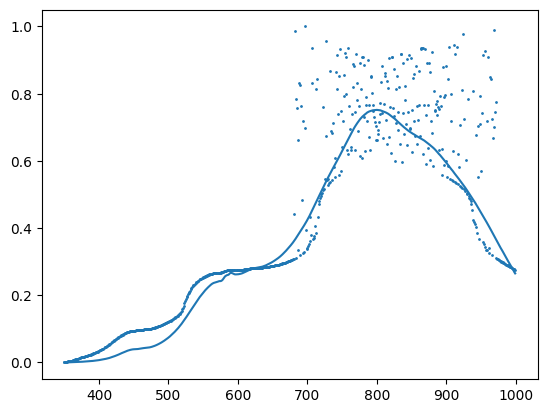

In [363]:
f_interp = interp1d(df_white_ref['Radiance'][:650], df_white_ref['Wavelength'][:650], fill_value='extrapolate')

g_x_values = f_interp(df_epidote['Radiance'][:650])
g_x_values = scaler.fit_transform(g_x_values.reshape(-1, 1))

plt.scatter(df_epidote['Wavelength'][:650], g_x_values, s=1)
plt.plot(df_epidote['Wavelength'][:650], df_epidote['Radiance'][:650])

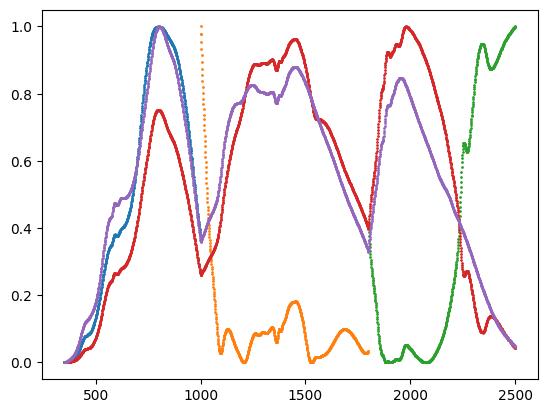

In [368]:
z_1 = np.polyfit(df_white_ref['Radiance'][:650], df_white_ref['Wavelength'][:650], 5)
p_1 = np.poly1d(z_1)

z_2 = np.polyfit(df_white_ref['Radiance'][650:1450], df_white_ref['Wavelength'][650:1450], 5)
p_2 = np.poly1d(z_2)

z_3 = np.polyfit(df_white_ref['Radiance'][1450:], df_white_ref['Wavelength'][1450:], 5)
p_3 = np.poly1d(z_3)

values1 = p_1(df_epidote['Radiance'][:650])
values1 = scaler.fit_transform(values1.reshape(-1, 1))

values2 = p_2(df_epidote['Radiance'][650:1450])
values2 = scaler.fit_transform(values2.reshape(-1, 1))

values3 = p_3(df_epidote['Radiance'][1450:])
values3 = scaler.fit_transform(values3.reshape(-1, 1))

plt.scatter(df_epidote['Wavelength'][:650], values1, s=1)
plt.scatter(df_epidote['Wavelength'][650:1450], values2, s=1)
plt.scatter(df_epidote['Wavelength'][1450:], values3, s=1)
plt.scatter(df_epidote['Wavelength'], df_epidote['Radiance'], s=1)
plt.scatter(df_white_ref['Wavelength'], df_white_ref['Radiance'], s=1)
plt.show()

In [ ]:
# This looks good, but still not perfect.
# More work is to be done...

In [408]:
# Creating a function to make other graphs

def make_graphs(df, att, name):
    z1 = np.polyfit(df_white_ref[att][:650], df_white_ref['Wavelength'][:650], 5)
    p1 = np.poly1d(z1)
    z2 = np.polyfit(df_white_ref[att][650:1450], df_white_ref['Wavelength'][650:1450], 5)
    p2 = np.poly1d(z2)
    z3 = np.polyfit(df_white_ref[att][1450:], df_white_ref['Wavelength'][1450:], 5)
    p3 = np.poly1d(z3)

    values1 = p1(df[att][:650])
    values1 = scaler.fit_transform(values1.reshape(-1, 1))
    values2 = p2(df[att][650:1450])
    values2 = scaler.fit_transform(values2.reshape(-1, 1))
    values3 = p3(df[att][1450:])
    values3 = scaler.fit_transform(values3.reshape(-1, 1))

    plt.scatter(df['Wavelength'][:650], values1, s=1, label='Corrected Spectra', color='green')
    plt.scatter(df['Wavelength'][650:1450], values2, s=1, label='Corrected Spectra', color='green')
    plt.scatter(df['Wavelength'][1450:], values3, s=1, label='Corrected Spectra', color='green')
    plt.scatter(df['Wavelength'], df[att], s=1, label='Original Spectra', color='blue')
    plt.scatter(df_white_ref['Wavelength'], df_white_ref[att], s=1, label='White Reference', color='red')
    plt.title('Spectra of ' + name)
    plt.xlabel('Wavelength')
    plt.ylabel('Normalised '+att)
    plt.legend(bbox_to_anchor=(1, 0.4), loc='center left', fontsize='small', title='Legend', title_fontsize='medium', shadow=True, markerscale=2)
    plt.savefig(name + att +'.png', bbox_inches='tight')
    plt.show()

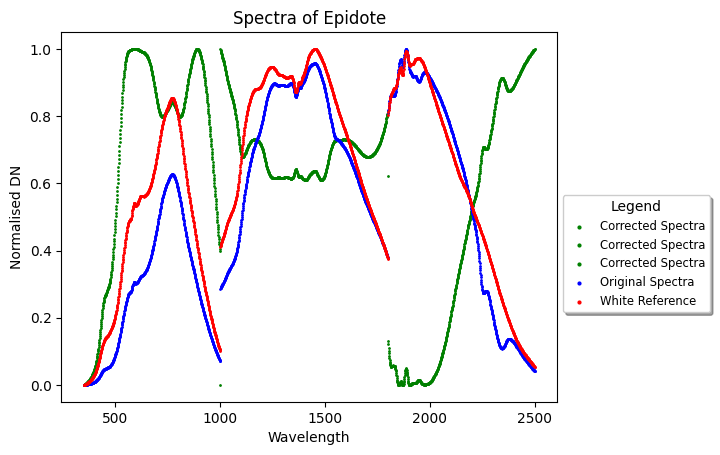

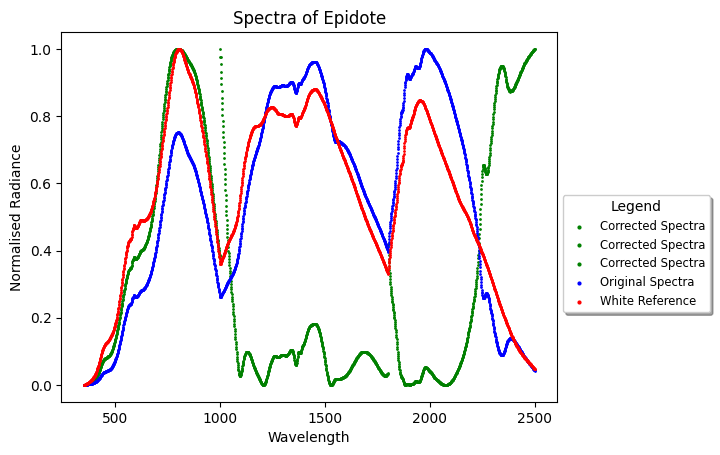

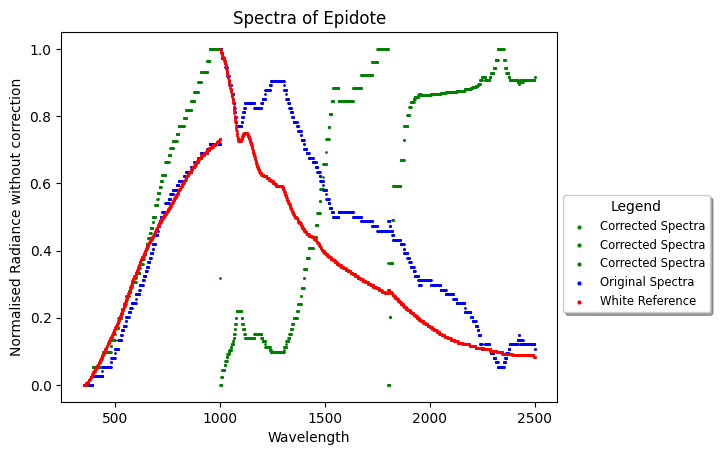

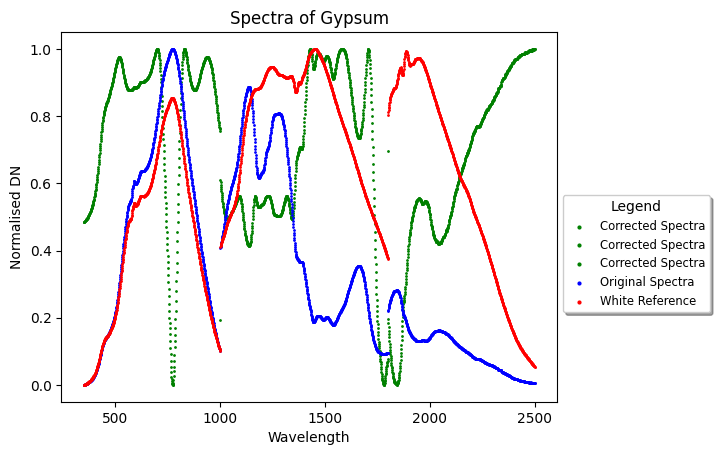

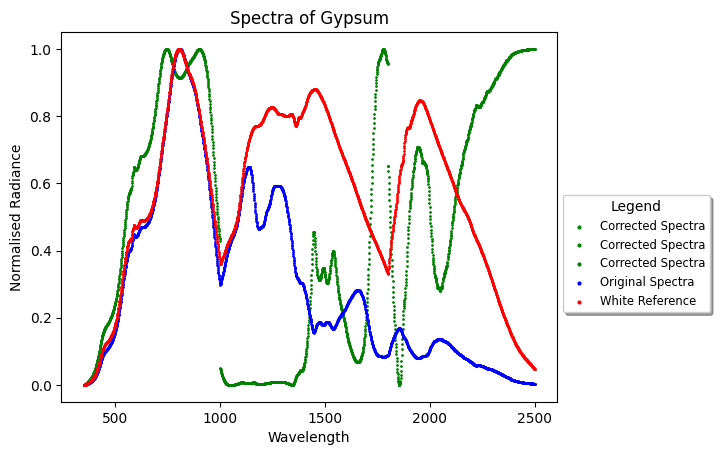

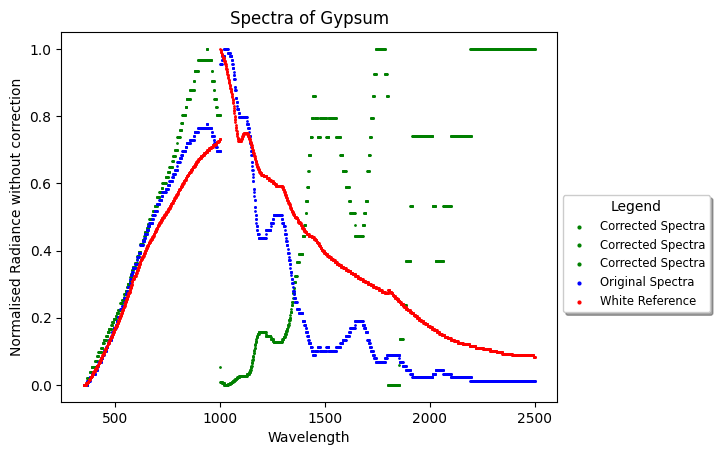

In [409]:
make_graphs(df_epidote, 'DN', 'Epidote')
make_graphs(df_epidote, 'Radiance', 'Epidote')
make_graphs(df_epidote, 'Radiance without correction', 'Epidote')

make_graphs(df_gypsum, 'DN', 'Gypsum')
make_graphs(df_gypsum, 'Radiance', 'Gypsum')
make_graphs(df_gypsum, 'Radiance without correction', 'Gypsum')